<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%matplotlib inline
import datetime as dt
import pandas as pd
import sys
import csv
import glob
import ipywidgets #as widgets
import itertools
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import socket

#from functionsuf import *
#from map_hospitals_v2 import *
from matplotlib import *
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib.dates import *
#style.use('ggplot')
from numpy.random import randn
#from scipy import statss
from pandas import  DataFrame, Series
import statsmodels.api as sm

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# import plotly.plotly as py
# import plotly.offline as plo
import cufflinks as cf
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)


sns.set()

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [2]:
year = '21'
month='07'
day = '07'

In [3]:
df_ec = pd.read_excel("resultados/resultados_"+year+month+day+".xlsx", dtype=object)
#df_ec = df_ec[df_ec['Day'] != 0]

In [4]:
# df_ec = df_ec.sort_values(['Name', 'Day', 'Puntos'])
# df_ec['Fase'] = 1

# df_temp = {}
# for nm in list(df_ec['Name'].unique()):
#     df_temp[nm] = df_ec[df_ec['Name']==nm]
#     df_temp[nm]['Puntos_Day'] = df_temp[nm]['Puntos'].diff().replace(np.nan, 0)
  
# df_ec = pd.concat([df_temp[nm] for nm in list(df_ec['Name'].unique())])

# df_ec = df_ec.sort_values(['Day', 'Name'])
# df_ec.to_excel("resultados_210615_fixed.xlsx", index=False)
# df_ec.head(20)

In [5]:
#df_ec.sample(10)

In [6]:
df_ec[df_ec['Day'] == df_ec['Day'].max()].sort_values(['Puntos_Day', 'Name'], ascending=[False, True]).reset_index(drop=True)   

,Name,Day,Fase,Puntos,Puntos_Day,Marcador,Ganador_Empate,Unnamed: 7
0,Eduardo,21,2,45,3,1,0,NaN
1,Massi,21,2,43,3,1,0,NaN
2,Pablo,21,2,44,3,1,0,NaN
3,Rebeca,21,2,45,3,1,0,NaN
4,Tanya,21,2,21,3,1,0,NaN
5,Martin,21,2,31,1,0,1,NaN
6,Nico,21,2,31,1,0,1,NaN
7,Ricardo,21,2,37,1,0,1,NaN
8,Salva,21,2,41,1,0,1,NaN
9,Sergio,21,2,37,1,0,1,NaN


In [7]:
#df_ec

Eduardo, Rebeca
Pablo
Massi
Salva
Ricardo, Sergio
Avelino
Carlos, Jorge
Martin, Nico
Miguel, Urbano
Tanya


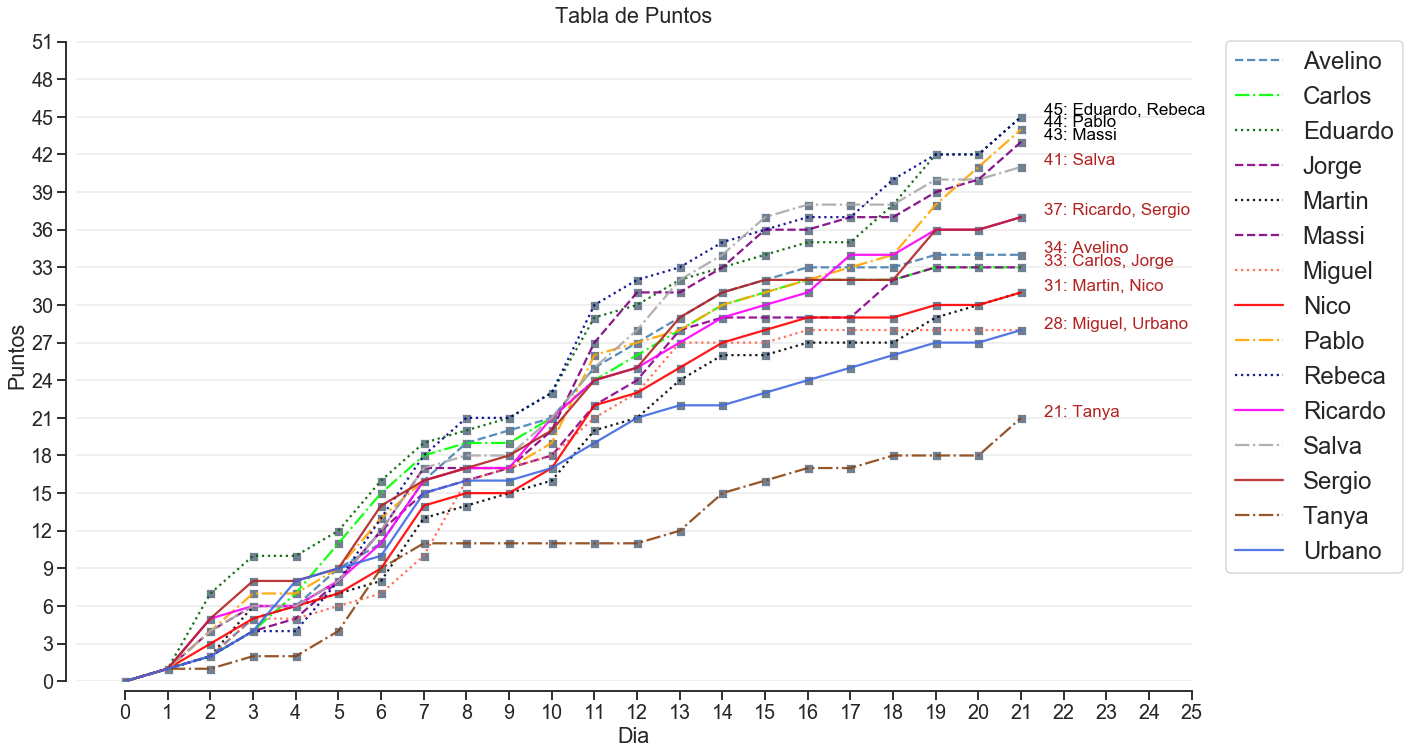

In [8]:
#expect.groupby('Month_Procedure')['BlastRate'].mean().plot()
from matplotlib import transforms as tf
from itertools import cycle, islice

sns.set(style="ticks", context="talk" , font_scale=1.2)
f, ax = plt.subplots(figsize=(20,12));

df_ec['Puntos'] = df_ec['Puntos'].astype(int)


#df_to_plot = df_ec.set_index('Day').groupby('Name')['Puntos']
df_to_plot = df_ec.pivot_table(values='Puntos', index='Day', columns='Name')
#display(df_to_plot)

# colors = ['FireBrick', 'FireBrick', 'FireBrick']
# i=0
# for name in list(df_to_plot['Name'].unique()):
#     df_to_plot[df_to_plot['Name']==name].plot(kind='line', marker='o', markersize = 10, alpha=0.7);
#     i+=1
    
color_dict = {'Avelino':'SteelBlue', 
              'Carlos':'Lime', 
              'Eduardo': 'DarkGreen', 
              'Jorge':'DarkMagenta', 
              'Martin':'Black', 
              'Massi':'Purple', 
              'Miguel':'Tomato', 
              'Nico':'Red',
              'Pablo': 'Orange',
              'Rebeca':'DarkBlue', 
              'Ricardo':'Magenta', 
              'Salva': 'DarkGray',
              'Sergio': 'FireBrick',
              'Tanya':'SaddleBrown',
              'Urbano':'RoyalBlue'}

style_dict = {'Eduardo': ':', 
              'Sergio': '-',
              'Pablo': '-.',
              'Jorge':'--', 
              'Martin':':', 
              'Ricardo':'-', 
              'Salva': '-.',
              'Avelino':'--', 
              'Miguel':':', 
              'Nico':'-',
              'Carlos':'-.', 
              'Massi':'--', 
              'Rebeca':':', 
              'Urbano':'-',
              'Tanya':'-.'}
        
    
marker = ['o', 's','^', 'v', '*',
         'o', 's','^', 'v', '*',
         'o', 's','^', 'v', '*']
marker_dict = {'Eduardo': 'o', 
              'Sergio': 's',
              'Pablo': '^',
              'Jorge':'v', 
              'Martin':'*', 
              'Ricardo':'o', 
              'Salva': 's',
              'Avelino':'^', 
              'Miguel':'v', 
              'Nico':'*',
              'Carlos':'o', 
              'Massi':'s', 
              'Rebeca':'^', 
              'Urbano':'v',
              'Tanya':'*'}

df_to_plot.plot(kind='line',  alpha=0.9, ax=ax,
                #marker = 'X',#[marker_dict.get(x, '#333333') for x in df_to_plot.columns],
                #markersize = 10, 
                style = [style_dict.get(x, '#333333') for x in df_to_plot.columns],
                color=[color_dict.get(x, '#333333') for x in df_to_plot.columns]);

sns.scatterplot(x ='Day' , y='Puntos', data=df_ec, ax=ax, marker = 's', color='SlateGrey')
                #marker = 'X',#[marker_dict.get(x, '#333333') for x in df_to_plot.columns],
                #markersize = 10, ;

df_ec_day = df_ec[df_ec['Day'] == df_ec['Day'].max()]
df_ec_day

loc_x_day = df_ec['Day'].max()+0.05

colors = ['FireBrick', 'FireBrick', 'FireBrick']#['ForestGreen', 'DarkOrange', 'FireBrick']
max_puntos = df_ec['Puntos'].max()
dict_puntos = {}
i = 0
for j in range(max_puntos,0,-1):
    list_names = sorted(list(df_ec_day[df_ec_day['Puntos'] == j]['Name'].unique()))

    if len(list_names) > 0:
        dict_puntos[j] = list_names
        
        listToStr_names = ', '.join([str(elem) for elem in dict_puntos[j]])
        print(listToStr_names)
        
        ydiff = 0.07
        
        if i < 3:
            
            ax.annotate(str(j)+': '+listToStr_names,
                        (loc_x_day, j*(1-ydiff)),
                        xytext=(loc_x_day, j*(1-ydiff)),  size=17,
                        textcoords='offset points', color='Black')#color=colors[i])
        
        else:
            ax.annotate(str(j)+': '+listToStr_names,
                        (loc_x_day, j*(1-ydiff)),
                        xytext=(loc_x_day, j*(1-ydiff)),  size=17,
                        textcoords='offset points', color='FireBrick')
        
        
        i+=1

plt.ylim(0,df_ec['Puntos'].max()+7)
plt.yticks(range(0, df_ec['Puntos'].max()+7, 3))

plt.xticks(range(0, df_ec['Day'].max()+5, 1))



plt.xlabel('Dia')
plt.ylabel('Puntos')
plt.title('Tabla de Puntos')

sns.despine(offset=10, trim=True)
ax.yaxis.grid(True, alpha=0.4)
ax.legend(bbox_to_anchor=(1.2, 1.0), loc=1, prop={'size': 24})
plt.savefig('figuras/resultados.jpg',bbox_inches='tight')

,Day,Mean
0,0,0.00
1,1,1.00
2,2,2.13
3,3,2.33
4,4,0.67
5,5,2.07
6,6,3.27
7,7,3.93
8,8,1.47
9,9,0.40


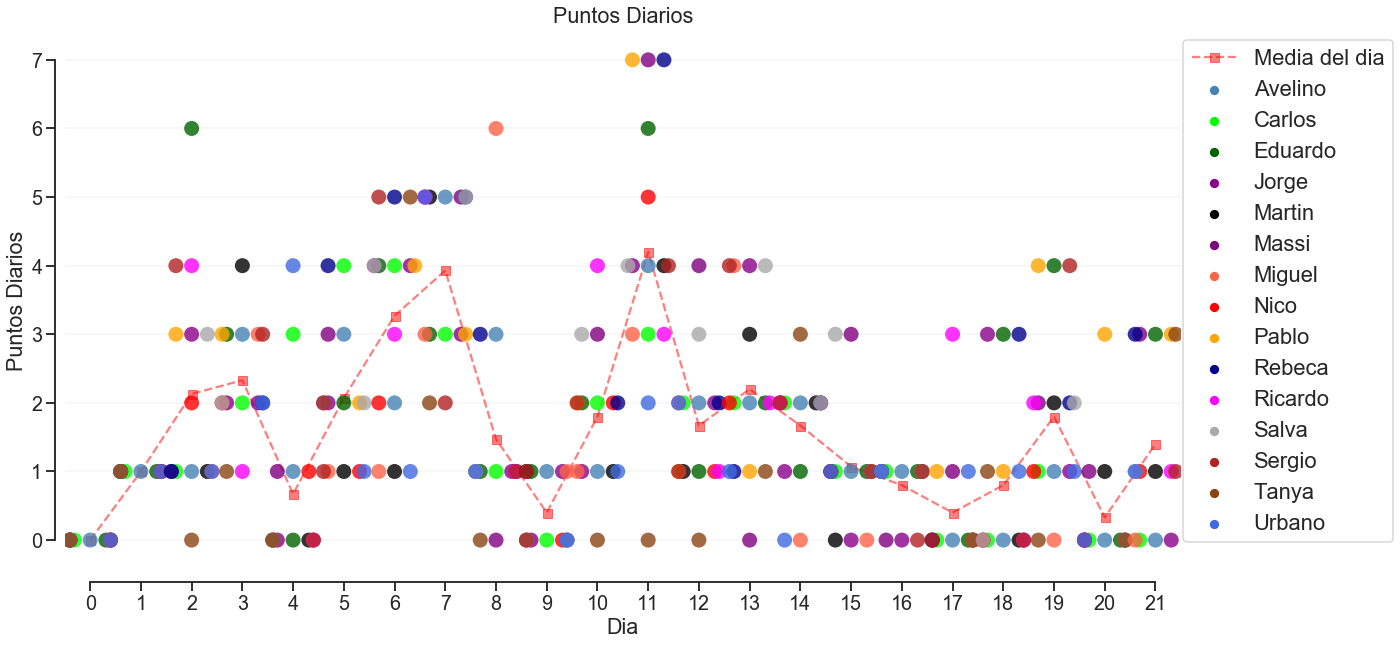

In [9]:
#expect.groupby('Month_Procedure')['BlastRate'].mean().plot()
from matplotlib import transforms as tf
from itertools import cycle, islice


sns.set(style="ticks", context="talk" , font_scale=1.2)
f, ax = plt.subplots(figsize=(20,10));

df_ec['Puntos_Day'] = df_ec['Puntos_Day'].astype(int)

sns.swarmplot(x='Day', y='Puntos_Day', data=df_ec, hue='Name', 
              size=15,
              palette=list(color_dict.values()), 
              alpha=0.8, ax=ax)
df_to_plot = df_ec.groupby('Day')['Puntos_Day'].mean().round(2).reset_index(name='Mean')
display(df_to_plot)
df_to_plot.plot(kind='line',  x ='Day' , y='Mean', alpha=0.5, style="--",
                marker='s', color='red' ,label='Media del dia', ax=ax, );


#df_to_plot.plot(kind='line',  alpha=0.9, ax=ax, marker='s', color='SlateGrey' ,legend=False);
#ax.get_legend()#.remove()

#plt.ylim(0, df_to_plot.max()+1)

#plt.xticks(range(0, df_ec['Day'].max()+2, 1))

plt.xlabel('Dia')
plt.ylabel('Puntos Diarios')
plt.title('Puntos Diarios')
ax.legend(bbox_to_anchor=(1.2, 1.0), loc=1, prop={'size': 22})

sns.despine(offset=10, trim=True)
ax.yaxis.grid(True, alpha=0.2)
plt.savefig('figuras/resultados_puntos_diarios.jpg', bbox_inches='tight')

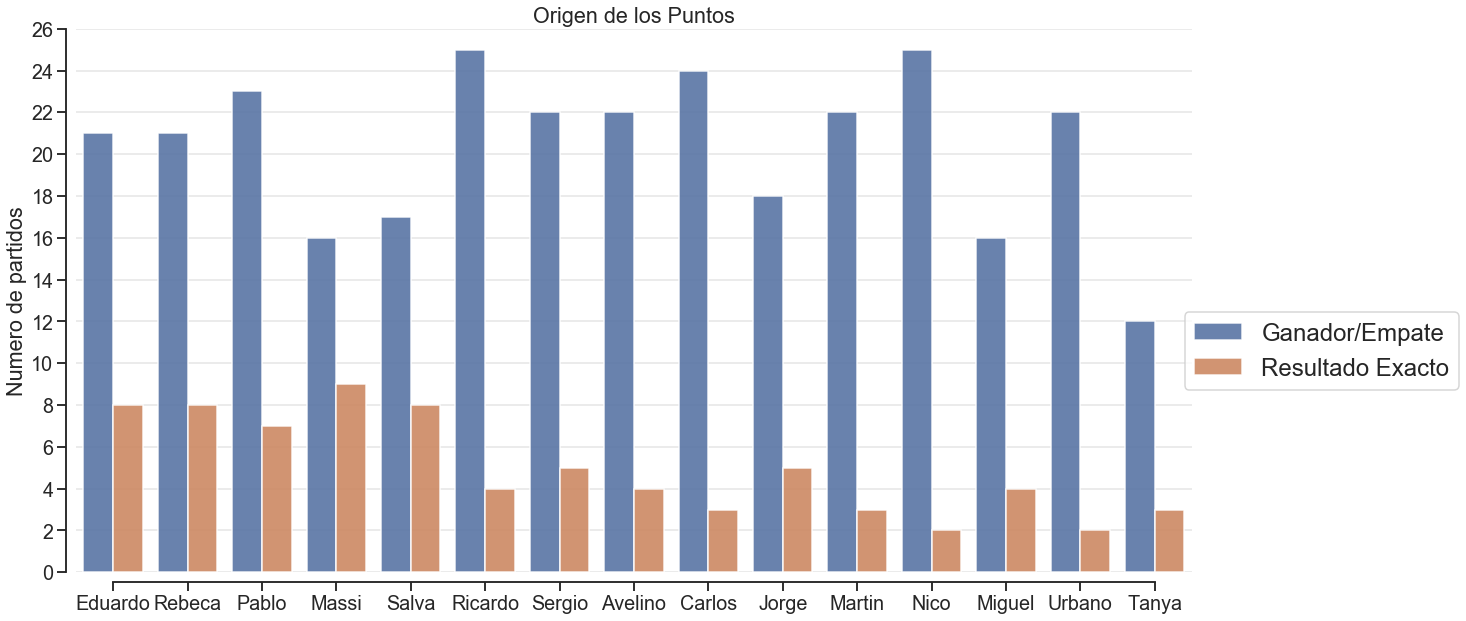

In [10]:
df_marcador = df_ec.groupby('Name')['Marcador'].sum().reset_index()
df_marcador
df_marcador.columns = ['Name', 'Aciertos']
df_marcador['Tipo'] = 'Resultado Exacto'

df_ganador = df_ec.groupby('Name')['Ganador_Empate'].sum().reset_index()
df_ganador.columns = ['Name', 'Aciertos']
df_ganador['Tipo'] = 'Ganador/Empate'

df_results = pd.concat([df_ganador, df_marcador])

df_results = df_results.sort_values('Tipo', ascending=False)

####### Sort according to list
list_positions = list(df_ec[df_ec['Day'] == df_ec['Day'].max()].sort_values('Puntos', ascending=False)['Name'])

sorterIndex = dict(zip(list_positions, range(len(list_positions))))
df_results['Name_Rank'] = df_results['Name'].map(sorterIndex)
df_results = df_results.sort_values('Name_Rank')

df_results.columns

sns.set(style="ticks", context="talk" , font_scale=1.2)
f, ax = plt.subplots(figsize=(20,10));

sns.barplot(x='Name', y='Aciertos', hue= 'Tipo',
            data=df_results.sort_values(['Name_Rank', 'Tipo'])[['Name', 'Tipo', 'Aciertos']], alpha=0.9)

plt.xlabel('')
plt.ylabel('Numero de partidos')
plt.title('Origen de los Puntos')
plt.ylim(0,df_results['Aciertos'].max()+1)
plt.yticks(range(0, df_results['Aciertos'].max()+2, 2))

sns.despine(offset=10, trim=True)
ax.yaxis.grid(True, alpha=0.5)
ax.legend(bbox_to_anchor=(1.25, 0.5), loc=1, prop={'size': 24})
plt.savefig('figuras/resultados_aciertos.jpg', bbox_inches='tight')

In [11]:
import plotly_express as px

In [12]:
df_stacked = df_ec.groupby(['Name','Fase'])[['Marcador','Ganador_Empate']].sum().reset_index()
df_stacked['Fase'] = 'Fase '+df_stacked['Fase'].astype(str)

df_stacked_1 = df_stacked[['Name', 'Fase', 'Marcador']]
df_stacked_1.columns = ['Name', 'Fase', 'Puntos']
df_stacked_1['Puntos'] = 3*df_stacked_1['Puntos'] 
df_stacked_1['Tipo'] = 'Resultado'

df_stacked_2 = df_stacked[['Name', 'Fase', 'Ganador_Empate']]
df_stacked_2.columns = ['Name', 'Fase', 'Puntos']
df_stacked_2['Tipo'] = 'Ganador_Empate'

df_stacked = pd.concat([df_stacked_1, df_stacked_2])
df_stacked['Tipo'] = df_stacked['Fase']+' - '+df_stacked['Tipo']

df_total = df_stacked.groupby('Name')['Puntos'].sum().reset_index()
df_total.columns =['Name', 'Total']

df_stacked = df_stacked.merge(df_total, on='Name', how='left')
df_stacked['Porcentaje'] = round(100*(df_stacked['Puntos']/df_stacked['Total']),1)


sorterIndex = dict(zip(list_positions, range(len(list_positions))))
df_stacked['Name_Rank'] = df_stacked['Name'].map(sorterIndex)
df_stacked = df_stacked.sort_values(['Name_Rank','Tipo'])

#display(df_stacked)

fig = px.bar(df_stacked, x='Name', y='Porcentaje', color='Tipo', text=df_stacked['Porcentaje'], title='Origen porcentual de los puntos')
fig.write_image("figuras/resultado_porcentual.png")
plot(fig, filename='figuras/ajepi_eurocopa_2020_porcentaje.html')
fig.show()

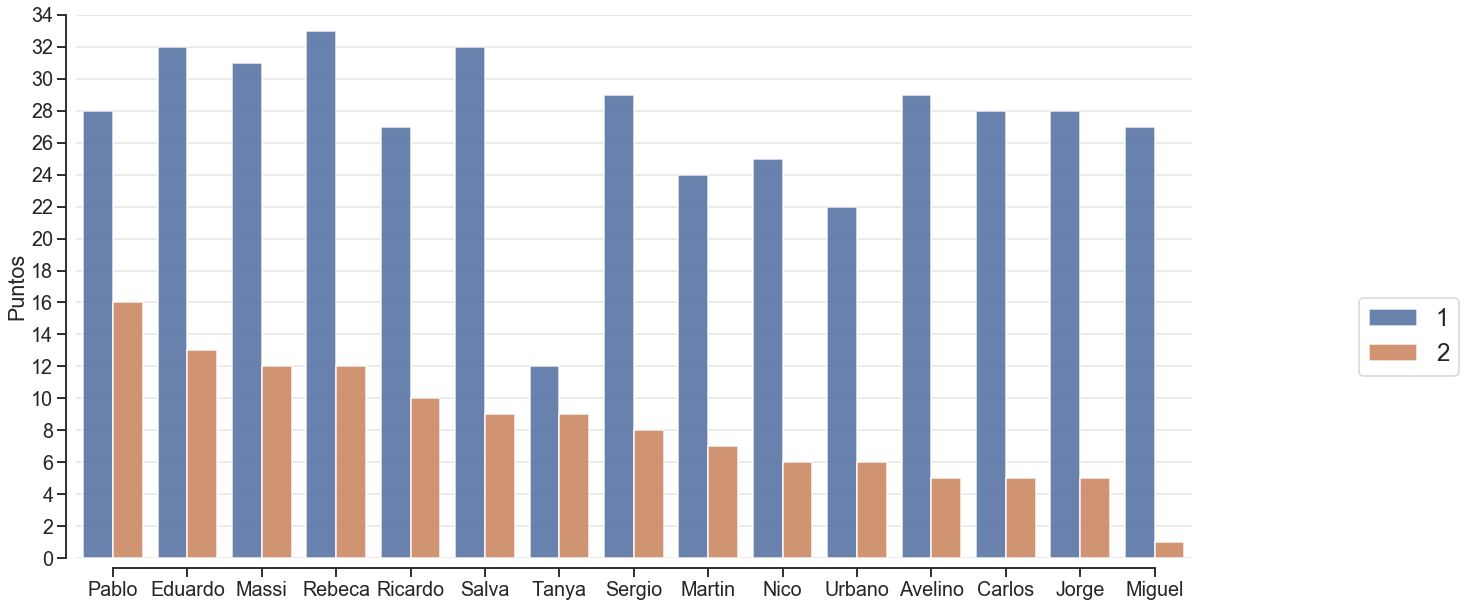

In [13]:
df_puntos_fases = df_ec.groupby(['Fase', 'Name'])['Puntos_Day'].sum().reset_index()#name='Puntos_Day')
df_puntos_fases


sns.set(style="ticks", context="talk" , font_scale=1.2)
f, ax = plt.subplots(figsize=(20,10));


list_positions = list(df_puntos_fases[df_puntos_fases['Fase'] == 2].sort_values('Puntos_Day', ascending=False)['Name'])
#list_positions

sorterIndex = dict(zip(list_positions, range(len(list_positions))))
df_puntos_fases['Name_Rank'] = df_puntos_fases['Name'].map(sorterIndex)
df_puntos_fases = df_puntos_fases.sort_values('Name_Rank')


sns.barplot(x='Name', y='Puntos_Day', hue= 'Fase',
            data=df_puntos_fases.sort_values('Name_Rank')[['Name', 'Fase','Puntos_Day']], alpha=0.9)

plt.xlabel('')
plt.ylabel('Puntos')
#plt.title('Puntos')
plt.ylim(0,df_puntos_fases['Puntos_Day'].max()+1)
plt.yticks(range(0, df_puntos_fases['Puntos_Day'].max()+2, 2))

sns.despine(offset=10, trim=True)
ax.yaxis.grid(True, alpha=0.5)
ax.legend(bbox_to_anchor=(1.25, 0.5), loc=1, prop={'size': 24})
#plt.savefig('figuras/resultados_aciertos.jpg', bbox_inches='tight')

In [14]:
fig = px.line(df_ec, x="Day", y="Puntos", color='Name', 
              hover_data=['Name', 'Puntos', 'Puntos_Day'],
              color_discrete_sequence = list(color_dict.values()),
              title= "Puntos acumulados",
              height=600, width = 800)
#fig = px.scatter(df_ec, x="Day", y="Puntos", color='Name', height=800, width = 1000)

fig.update_layout(
#     showlegend=False,
    plot_bgcolor="white",
#    margin=dict(t=10,l=10,b=10,r=10)
)


fig.show()


plot(fig, filename='figuras/ajepi_eurocopa_2020.html')

'figuras/ajepi_eurocopa_2020.html'

In [15]:
#STOP

In [16]:
test = df_ec.sort_values(['Name', 'Day']).groupby('Name')['Puntos_Day'].rolling(window=3).mean().round(2).reset_index(name='Media_movil')
df_ec['level_1'] = df_ec.index

df_ec = df_ec.merge(test, on=['level_1', 'Name'], how='outer')

#df_ec[df_ec['Name']=='Rebeca'].tail(10)

Name,Avelino,Carlos,Eduardo,Jorge,Martin,Massi,Miguel,Nico,Pablo,Rebeca,Ricardo,Salva,Sergio,Tanya,Urbano
Day,,,,,,,,,,,,,,,
2,0.67,0.67,2.33,1.33,0.67,0.67,0.67,1.00,1.33,0.67,1.67,1.33,1.67,0.33,0.67
3,1.67,1.33,3.33,2.00,2.00,1.33,1.67,1.67,2.33,1.33,2.00,2.00,2.67,0.67,1.33
4,1.67,2.00,3.00,1.67,1.67,1.33,1.33,1.67,2.00,1.00,1.67,1.67,2.33,0.33,2.33
5,2.33,3.00,1.67,1.33,1.67,2.00,1.33,1.33,1.67,2.00,1.00,1.33,1.33,1.00,2.33
6,2.00,3.67,2.00,2.00,0.67,2.67,0.67,1.33,2.00,3.00,1.67,2.00,2.00,2.33,2.00
7,3.33,3.67,3.00,3.00,2.33,4.00,1.67,2.67,3.00,4.67,3.33,3.67,2.67,3.00,2.33
8,3.33,2.67,2.67,2.67,2.33,3.00,3.33,2.67,2.67,4.33,3.00,3.33,2.67,2.33,2.33
9,3.00,1.33,1.67,1.67,2.33,1.67,3.33,2.00,1.33,2.67,2.00,2.00,1.33,0.67,2.00
10,1.67,1.00,1.33,1.00,1.00,1.00,2.67,1.00,1.00,1.67,1.67,1.33,1.33,0.00,0.67


Nico, Urbano
Eduardo
Martin
Ricardo, Salva, Tanya
Rebeca, Sergio
Avelino, Carlos, Jorge
Pablo
Massi
Miguel


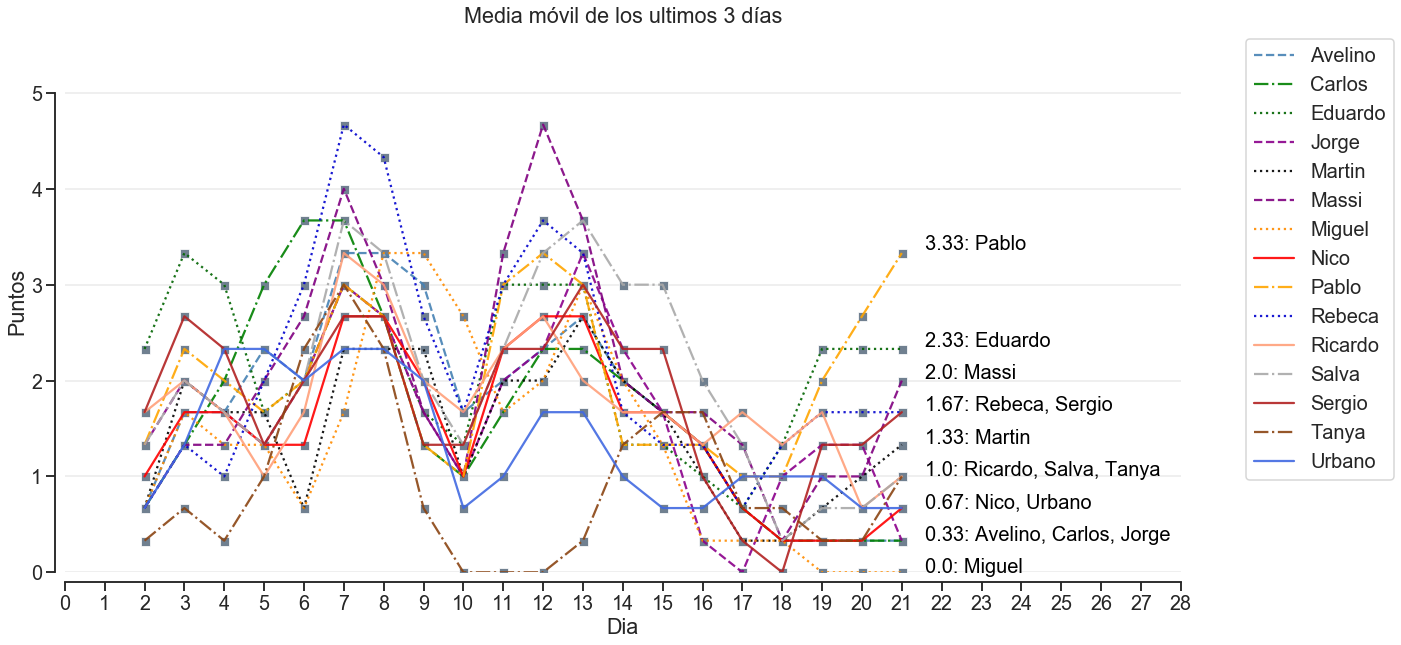

In [17]:
#expect.groupby('Month_Procedure')['BlastRate'].mean().plot()
from matplotlib import transforms as tf
from itertools import cycle, islice

sns.set(style="ticks", context="talk" , font_scale=1.2)
f, ax = plt.subplots(figsize=(20,10));

df_ec['Puntos_Day'] = df_ec['Puntos_Day'].astype(int)



df_to_plot = df_ec.pivot_table(values='Media_movil', index='Day', columns='Name')
#df_to_plot = df_to_plot.rolling(window=3).mean()
    
color_dict = {'Eduardo': 'DarkGreen', 
              'Sergio': 'FireBrick',
              'Pablo': 'Orange',
              'Jorge':'DarkMagenta', 
              'Martin':'Black', 
              'Ricardo':'LightSalmon', 
              'Salva': 'DarkGray',
              'Avelino':'SteelBlue', 
              'Miguel':'DarkOrange', 
              'Nico':'Red',
              'Carlos':'Green', 
              'Massi':'Purple', 
              'Rebeca':'MediumBlue', 
              'Urbano':'RoyalBlue',
              'Tanya':'SaddleBrown'}

style_dict = {'Eduardo': ':', 
              'Sergio': '-',
              'Pablo': '-.',
              'Jorge':'--', 
              'Martin':':', 
              'Ricardo':'-', 
              'Salva': '-.',
              'Avelino':'--', 
              'Miguel':':', 
              'Nico':'-',
              'Carlos':'-.', 
              'Massi':'--', 
              'Rebeca':':', 
              'Urbano':'-',
              'Tanya':'-.'}
        
    
marker = ['o', 's','^', 'v', '*',
         'o', 's','^', 'v', '*',
         'o', 's','^', 'v', '*']
marker_dict = {'Eduardo': 'o', 
              'Sergio': 's',
              'Pablo': '^',
              'Jorge':'v', 
              'Martin':'*', 
              'Ricardo':'o', 
              'Salva': 's',
              'Avelino':'^', 
              'Miguel':'v', 
              'Nico':'*',
              'Carlos':'o', 
              'Massi':'s', 
              'Rebeca':'^', 
              'Urbano':'v',
              'Tanya':'*'}
display(df_to_plot)


df_to_plot.plot(kind='line',  alpha=0.9, ax=ax,
                #marker = 'X',#[marker_dict.get(x, '#333333') for x in df_to_plot.columns],
                #markersize = 10, 
                style = [style_dict.get(x, '#333333') for x in df_to_plot.columns],
                color=[color_dict.get(x, '#333333') for x in df_to_plot.columns]);

sns.scatterplot(x ='Day' , y='Media_movil', data=df_ec, ax=ax, marker = 's', color='SlateGrey')
                #marker = 'X',#[marker_dict.get(x, '#333333') for x in df_to_plot.columns],
                #markersize = 10, ;

df_ec_day = df_ec[df_ec['Day'] == df_ec['Day'].max()]
df_ec_day

loc_x_day = df_ec['Day'].max()+0.05

colors = ['FireBrick', 'FireBrick', 'FireBrick']#['ForestGreen', 'DarkOrange', 'FireBrick']
max_puntos = df_ec['Media_movil'].max()
dict_puntos = {}
i = 0
for j in list(df_ec['Media_movil'].unique()):
    list_names = sorted(list(df_ec_day[df_ec_day['Media_movil'] == j]['Name'].unique()))

    if len(list_names) > 0:
        dict_puntos[j] = list_names
        
        listToStr_names = ', '.join([str(elem) for elem in dict_puntos[j]])
        print(listToStr_names)
        
#        if i < 3:
            
        ax.annotate(str(j)+': '+listToStr_names,
                    (loc_x_day, j),
                    xytext=(loc_x_day, j),  size=20,
                    textcoords='offset points', color='Black')#color=colors[i])

#         else:
#             ax.annotate(str(j)+': '+listToStr_names,
#                         (loc_x_day, j),
#                         xytext=(loc_x_day, j),  size=20,
#                         textcoords='offset points', color='FireBrick')
        
        
        i+=1

plt.ylim(0,df_ec['Media_movil'].max()+1)

plt.xticks(range(0, df_ec['Day'].max()+8, 1))
plt.title('Media móvil de los ultimos 3 días')

plt.xlabel('Dia')
plt.ylabel('Puntos')


sns.despine(offset=10, trim=True)
ax.yaxis.grid(True, alpha=0.4)
ax.legend(bbox_to_anchor=(1.2, 1.0), loc=1, prop={'size': 20})
plt.savefig('figuras/resultados_rolling.jpg', bbox_inches='tight')

In [18]:
np.arange(0,5,1)

array([0, 1, 2, 3, 4])

In [19]:
fig = px.line(df_ec, x="Day", y="Media_movil", color='Name', 
              hover_data=['Name', 'Puntos', 'Media_movil'], 
              color_discrete_sequence = list(color_dict.values()),
              title= "Media móvil de los ultimos 3 dias",
              height=600, width = 900)
#fig = px.scatter(df_ec, x="Day", y="Puntos", color='Name', height=800, width = 1000)

fig.update_layout(
#     showlegend=False,
    plot_bgcolor="white",
#    margin=dict(t=10,l=10,b=10,r=10)
)

fig.update_yaxes(tickvals=np.arange(0,6,0.5))

fig.show()


plot(fig, filename='figuras/ajepi_eurocopa_2020_media.html')

'figuras/ajepi_eurocopa_2020_media.html'

In [20]:
# #expect.groupby('Month_Procedure')['BlastRate'].mean().plot()
# from matplotlib import transforms as tf
# from itertools import cycle, islice

# sns.set(style="ticks", context="talk" , font_scale=1.2)
# f, ax = plt.subplots(figsize=(20,10));

# df_ec['Puntos_Day'] = df_ec['Puntos_Day'].astype(int)
# #df_ec = df_ec[df_ec['Day'] != 0]

# df_to_plot = df_ec.groupby('Day')['Puntos_Day'].mean().round(2)
# display(df_to_plot)
# df_to_plot.plot(kind='line',  alpha=0.9, ax=ax, marker='s', color='SlateGrey' ,legend=False);
# #ax.get_legend()#.remove()

# plt.ylim(0, df_to_plot.max()+1)

# plt.xticks(range(0, df_ec['Day'].max()+2, 1))

# plt.xlabel('Dia')
# plt.ylabel('Media de Puntos Diarios')


# sns.despine(offset=10, trim=True)
# ax.yaxis.grid(True, alpha=0.4)
# #ax.legend(bbox_to_anchor=(1.05, 1.0), loc=1, prop={'size': 24})
# # plt.savefig('resultados_day_mean.jpg',)